<a href="https://colab.research.google.com/github/Je0azul5/IA-ML/blob/main/TPRvsFPRtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, PrecisionRecallDisplay

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Je0azul5/weired/master/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
training, test= train_test_split(df,test_size=0.3)
training.count()

Pregnancies                 537
Glucose                     537
BloodPressure               537
SkinThickness               537
Insulin                     537
BMI                         537
DiabetesPedigreeFunction    537
Age                         537
Outcome                     537
dtype: int64

Dividir en variables de entrada y salida

X =

y = 

In [ ]:
X=training[['Pregnancies' ,	'Glucose' ,	'BloodPressure' ,	'SkinThickness' ,	'Insulin', 	'BMI' ,	'DiabetesPedigreeFunction' ,	'Age']]
y=training[['Outcome']]


Estandarizar X (escalar usando Estandarización)

In [ ]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

Dividir en entrenamiento y test(30%)

X_train, X_test, y_train, y_test =

In [ ]:
xTrain, xVal, yTrain, yVal=train_test_split(X,y, test_size=0.3) 

Entrenar un clasificador de Regresión Logística

In [ ]:
clf = LogisticRegression()
clf.fit(xTrain,yTrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yPredict= clf.predict(xVal)

In [ ]:
yPredict

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
yTrain

,Outcome
688,0
217,0
331,0
40,0
472,0
...,...
70,1
283,1
471,0
25,1


Calcular Accuracy, Precision y Recall con el conjunto de test

In [ ]:
#Acurracy
accuracy_score(yVal,yPredict)

0.7654320987654321

In [ ]:
#Precision
precision_score(yVal,yPredict)

0.7222222222222222

In [ ]:
#Recall
recall_score(yVal,yPredict)

0.48148148148148145

Crear una función clasificar que devuelva 1 si tiene diabetes o 0
 si no,dependiendo si la probabilidad sobrepasa un umbral

In [ ]:
yVal

,Outcome
543,0
659,1
484,1
500,0
309,1
...,...
153,0
712,1
602,0
1,0


    Función que determina si para un conjunto de muestras,cada muestra pertenece o no a la clase

    Args:
        clf: clasificador entrenado
        X: matriz de variables de entrada
        umbral: valor a tener en cuenta para determinar si una muestra es 
        de la clase 1 o no
        basado en las probabilidades retornadas por el clasificador.

    Returns:
        y: Devuelve un arreglo correspondiente a las clases encontradas para cada 
        una de las muestras

    

In [ ]:
def clasificar(clf, X, umbral):

      y=clf.predict_proba(X)
      #return np.greater(y,umbral)
      return  [int(i[1]>umbral) for i in y]
      

In [ ]:
len(clasificar(clf, X, 0.5))

537

In [ ]:
len(training)

537

In [ ]:
precision, recall,_=precision_recall_curve(yVal,yPredict)

In [ ]:
disp =PrecisionRecallDisplay(precision=precision,recall=recall,average_precision=0,estimator_name=None)

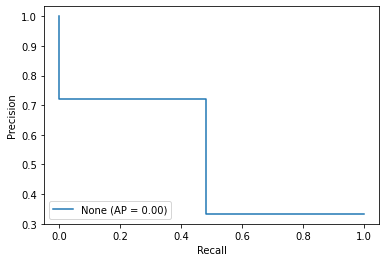

In [ ]:
disp.plot() 

In [ ]:
#trp
#fpr
#umbral
umbral=np.arange(0,100,1)
trp=[]
fpr=[]
for i in umbral:
  cls=clasificar(clf,xVal,1/(i+1))
  trp.append( recall_score(yVal,cls))
  fpr.append(1- recall_score(np.logical_not(yVal),np.logical_not(cls)))

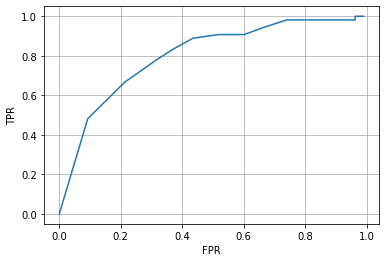

In [ ]:
plt.plot(fpr,trp)
plt.grid()
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()